# Project - Medical Costs (Regression)

For this project I explore a medical costs data set which can be found online (on Kaggle) and I attempt to make a model which can accurately predict the cost. 

In [1]:
#Importing important packages for use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Taking in data from online and reading in the csv file
url ='https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df =  pd.read_csv(url)

Looking at the info of the dataframe we see there is no missing data. There is also a mix of numeric and catagorical features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Some stats for the numeric data columns. Note the std of the charges is around 12000. However 50% of the charges are between around 4700 and 16600. So the large standard deviation is likely down to outliers.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Note here we have some catagorical columns which we are going to need to deal with.

In [5]:
#Head of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


See if there are any two columns within the numerical columns which correlate highly with each other.

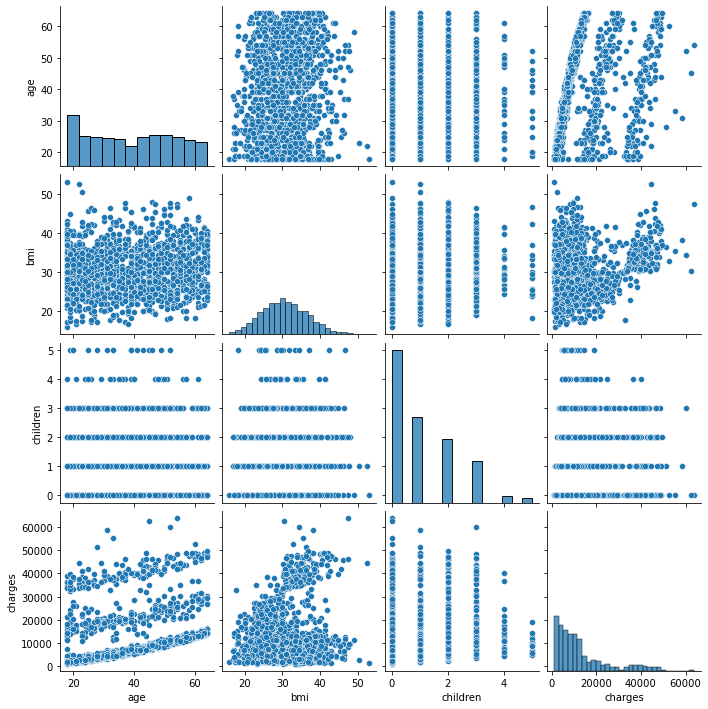

In [6]:
#Pairplot
sns.pairplot(df)

Number of males and females in the dataset.

<AxesSubplot:xlabel='sex', ylabel='count'>

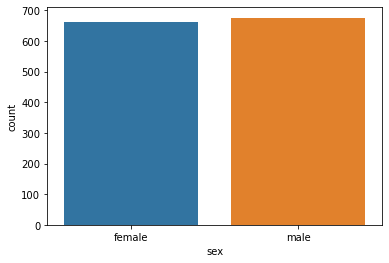

In [7]:
sns.countplot(x='sex',data=df)

Number of smokers and non-smokers in the dataset.

<AxesSubplot:xlabel='smoker', ylabel='count'>

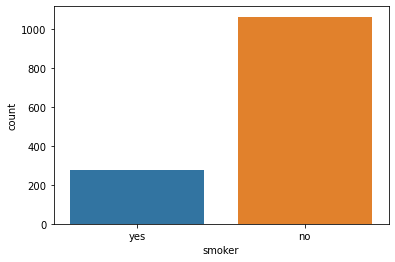

In [8]:
sns.countplot(x='smoker',data=df)

Where do people live? Note most live in the southeast but it's overwise well spread across the different regions.

<AxesSubplot:xlabel='count', ylabel='region'>

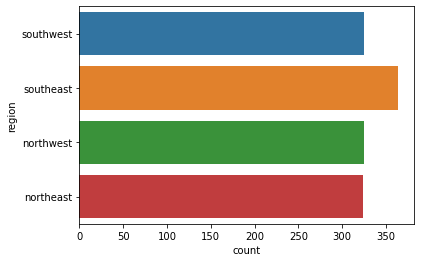

In [9]:
sns.countplot(y='region',data=df)

Here I am making a function which will change my sex catagory from male and female to 1 and 0, i.e., making the sex catagory numeric.

In [10]:
#Function for changing sex to a numeric column
def sex(sex):
    '''Return 1 for male and 0 for female.'''
    if sex == 'male':
        return 1
    else:
        return 0

In [11]:
#Making the new column
df['sex_zero_one']  = df['sex'].apply(sex)

In [12]:
#Droping the original sex column
df.drop('sex',axis=1,inplace=True)
df.head()

,age,bmi,children,smoker,region,charges,sex_zero_one
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


Here I am making a function which will change my smoker catagory from yes and no to 1 and 0, i.e., making the smoker catagory numeric. Note both of these catagories could be changed to numeric using map and a dictionary.

In [13]:
#Making a function to chnage the smoker column to a numeric variable
def smoker(smoker):
    '''Return 1 for a smoker 'yes' and 0 for a non-smoker 'no'.'''
    if smoker == 'yes':
        return 1
    if smoker == 'no':
        return 0

In [14]:
#Making the new column for smoker or non smoker
df['smoker_zero_one'] = df['smoker'].apply(lambda x: smoker(x))

In [15]:
#Drop the original smoker column
df.drop('smoker',axis=1,inplace=True)

Using get dummies to change the region column to a numeric column and dropping the original region column.

In [16]:
new_columns = pd.get_dummies(df['region'],drop_first=True)
df.drop('region',axis=1,inplace=True)

In [17]:
#Combining the current dataframe with the new region columns
df = pd.concat([df,new_columns],axis=1)

Now we have a dataframe with only numeric columns from which we can train a model.

In [18]:
#Head of the new data frame
df.head()

,age,bmi,children,charges,sex_zero_one,smoker_zero_one,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [19]:
#Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [20]:
#Spliting the data
X = df.drop('charges',axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

We are going to start by using a simple linear regression model from sklearn.

In [21]:
#Importing the linear regression model
from sklearn.linear_model import LinearRegression

In [22]:
#Making a instance of the model
model = LinearRegression()

In [23]:
#Fit the model to the data
model.fit(X_train,y_train)

LinearRegression()

In [24]:
#Making predictions with the model
predictions = model.predict(X_test)

In [25]:
#Importing the metrics from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

As we see here the model did an ok job of predicting the price of medical costs. 

In [26]:
#Metrics of the model
print('Mean absolute error:')
print(mean_absolute_error(y_test,predictions))
print('Mean squared error:' )
print(mean_squared_error(y_test,predictions))
print('Square root of Mean squared error:' )
print(np.sqrt(mean_squared_error(y_test,predictions)))

Mean absolute error:
3987.962847697632
Mean squared error:
33683659.324656494
Square root of Mean squared error:
5803.762514494929


Looking at a graph comparing the predictions from the model and the true results we see that some of the error is coming from the more expensive medical fees. To try to improve our results we will look at the same data set but remove some of the excessive fees (outliers). 

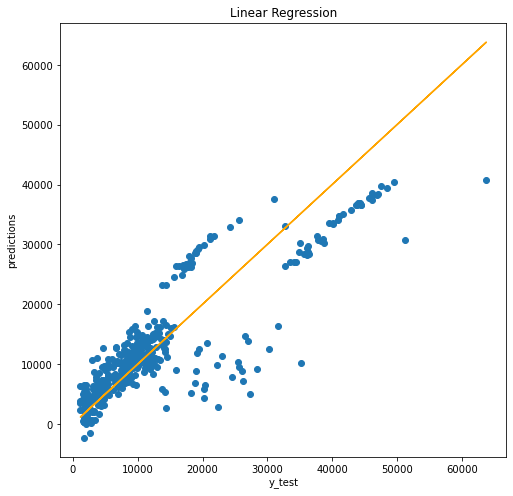

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Linear Regression')
plt.plot(y_test,y_test,color='orange')

Now we are going to remove the outliers from the dataset and then make a new model and test the new model and see if we find our results are better than before.

In [28]:
Q1 = df.quantile(0.25)['charges']
Q3 = df.quantile(0.75)['charges']
IQR = Q3 - Q1

df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

Here I am using the standard way in which one removes the outliers of a data set. We can see below that this has reduce the number of rows of data from 1338 to 1199. Note all the outliers are above Q3 + 1.5 IQR.

In [29]:
df_new.count()

age                1199
bmi                1199
children           1199
charges            1199
sex_zero_one       1199
smoker_zero_one    1199
northwest          1199
southeast          1199
southwest          1199
dtype: int64

In [30]:
df_new.head()

,age,bmi,children,charges,sex_zero_one,smoker_zero_one,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Now we train the new model.

In [31]:
#Spliting the data
X = df_new.drop('charges',axis=1)
y = df_new['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
#Making a instance of the model
model = LinearRegression()

In [33]:
#Fit the model to the data
model.fit(X_train,y_train)

LinearRegression()

In [34]:
#Making predictions with the model
predictions = model.predict(X_test)

Comparing these results with those before we have a slight improvement in the different error metrics when we take out the outliers. This is some what expected when we look at the graph above of the predictions and true values.

In [35]:
#Metrics of the model
print('Mean absolute error:')
print(mean_absolute_error(y_test,predictions))
print('Mean squared error:' )
print(mean_squared_error(y_test,predictions))
print('Square root of Mean squared error:' )
print(np.sqrt(mean_squared_error(y_test,predictions)))

Mean absolute error:
2488.5801199069147
Mean squared error:
17827851.35261327
Square root of Mean squared error:
4222.304033654288


In [36]:
from sklearn.metrics import explained_variance_score

In [37]:
explained_variance_score(y_test,predictions)

0.6236140664255541

The explained variance score here will be use to compare with another model we will tryout.

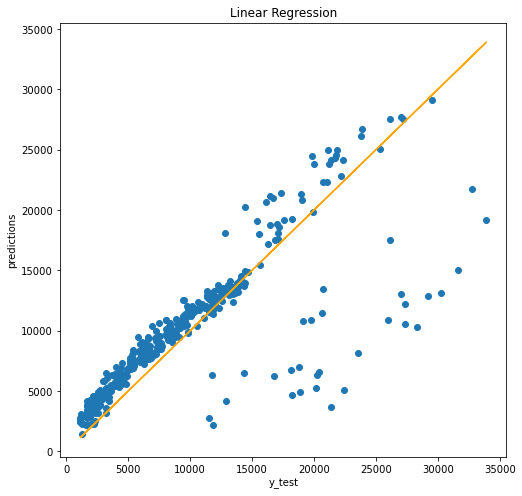

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Linear Regression')
plt.plot(y_test,y_test,color='orange')

Here we see a resonable improvement in the results of the model with a reduction by around 1600 in the mean squared error of the model.

From here I believe that with more features columns we could imporve the results further and figure out why there are some significant outliers with expensive medical fees. The current model would also be able to imporve with more features. Additionally, we could look to use another model instead of a standard linear regression model to improve our predictions. Now we will look at a deep learning model.

## Deep learning and Neural Networks

In [39]:
#Train test split
X = df_new.drop('charges',axis=1).values
y = df_new['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

First we will scale the data.

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scalar = MinMaxScaler()

In [42]:
X_train = scalar.fit_transform(X_train)

In [43]:
X_test = scalar.transform(X_test)

Import some important tensorflow and keras packages

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [46]:
X_train.shape

(839, 8)

Our model

In [47]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

Fitting the model

In [48]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=2500,callbacks=[early_stop])

Epoch 1/2500
7/7 [==============================] - 1s 50ms/step - loss: 10042.4629 - val_loss: 9660.3691
Epoch 2/2500
7/7 [==============================] - 0s 5ms/step - loss: 10042.4258 - val_loss: 9660.3311
Epoch 3/2500
7/7 [==============================] - 0s 5ms/step - loss: 10042.3887 - val_loss: 9660.2920
Epoch 4/2500
7/7 [==============================] - 0s 5ms/step - loss: 10042.3467 - val_loss: 9660.2490
Epoch 5/2500
7/7 [==============================] - 0s 4ms/step - loss: 10042.3018 - val_loss: 9660.2012
Epoch 6/2500
7/7 [==============================] - 0s 5ms/step - loss: 10042.2500 - val_loss: 9660.1455
Epoch 7/2500
7/7 [==============================] - 0s 5ms/step - loss: 10042.1904 - val_loss: 9660.0811
Epoch 8/2500
7/7 [==============================] - 0s 5ms/step - loss: 10042.1230 - val_loss: 9660.0059
Epoch 9/2500
7/7 [==============================] - 0s 5ms/step - loss: 10042.0430 - val_loss: 9659.9180
Epoch 10/2500
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 9496.8262 - val_loss: 9103.4512
Epoch 79/2500
7/7 [==============================] - 0s 4ms/step - loss: 9465.1123 - val_loss: 9071.4600
Epoch 80/2500
7/7 [==============================] - 0s 4ms/step - loss: 9432.2617 - val_loss: 9038.0762
Epoch 81/2500
7/7 [==============================] - 0s 4ms/step - loss: 9397.9346 - val_loss: 9003.3662
Epoch 82/2500
7/7 [==============================] - 0s 5ms/step - loss: 9362.0850 - val_loss: 8967.3271
Epoch 83/2500
7/7 [==============================] - 0s 4ms/step - loss: 9325.0049 - val_loss: 8929.7852
Epoch 84/2500
7/7 [==============================] - 0s 4ms/step - loss: 9286.4160 - val_loss: 8890.7871
Epoch 85/2500
7/7 [==============================] - 0s 5ms/step - loss: 9246.2832 - val_loss: 8850.3555
Epoch 86/2500
7/7 [==============================] - 0s 5ms/step - loss: 9204.5713 - val_loss: 8808.4238
Epoch 87/2500
7/7 [==============================] - 0s 5ms/step - lo

7/7 [==============================] - 0s 4ms/step - loss: 5267.9341 - val_loss: 5014.6753
Epoch 156/2500
7/7 [==============================] - 0s 5ms/step - loss: 5245.6592 - val_loss: 4991.8604
Epoch 157/2500
7/7 [==============================] - 0s 4ms/step - loss: 5225.6973 - val_loss: 4969.9912
Epoch 158/2500
7/7 [==============================] - 0s 4ms/step - loss: 5206.1787 - val_loss: 4950.0215
Epoch 159/2500
7/7 [==============================] - 0s 4ms/step - loss: 5187.8389 - val_loss: 4931.5938
Epoch 160/2500
7/7 [==============================] - 0s 5ms/step - loss: 5172.1152 - val_loss: 4914.0693
Epoch 161/2500
7/7 [==============================] - 0s 4ms/step - loss: 5155.6777 - val_loss: 4897.8604
Epoch 162/2500
7/7 [==============================] - 0s 4ms/step - loss: 5140.5117 - val_loss: 4883.1675
Epoch 163/2500
7/7 [==============================] - 0s 4ms/step - loss: 5126.0376 - val_loss: 4869.2832
Epoch 164/2500
7/7 [==============================] - 0s 4ms/

7/7 [==============================] - 0s 4ms/step - loss: 4668.9238 - val_loss: 4444.8457
Epoch 233/2500
7/7 [==============================] - 0s 4ms/step - loss: 4663.6450 - val_loss: 4439.4077
Epoch 234/2500
7/7 [==============================] - 0s 4ms/step - loss: 4658.0767 - val_loss: 4434.0527
Epoch 235/2500
7/7 [==============================] - 0s 4ms/step - loss: 4652.6104 - val_loss: 4428.8730
Epoch 236/2500
7/7 [==============================] - 0s 7ms/step - loss: 4647.0518 - val_loss: 4423.5122
Epoch 237/2500
7/7 [==============================] - 0s 5ms/step - loss: 4641.4956 - val_loss: 4418.1904
Epoch 238/2500
7/7 [==============================] - 0s 5ms/step - loss: 4636.1411 - val_loss: 4412.8936
Epoch 239/2500
7/7 [==============================] - 0s 4ms/step - loss: 4630.3496 - val_loss: 4407.4272
Epoch 240/2500
7/7 [==============================] - 0s 5ms/step - loss: 4624.6870 - val_loss: 4401.9443
Epoch 241/2500
7/7 [==============================] - 0s 4ms/

7/7 [==============================] - 0s 4ms/step - loss: 4164.3877 - val_loss: 3948.5115
Epoch 310/2500
7/7 [==============================] - 0s 4ms/step - loss: 4155.8745 - val_loss: 3940.6506
Epoch 311/2500
7/7 [==============================] - 0s 4ms/step - loss: 4147.2988 - val_loss: 3932.6450
Epoch 312/2500
7/7 [==============================] - 0s 4ms/step - loss: 4139.0073 - val_loss: 3924.1560
Epoch 313/2500
7/7 [==============================] - 0s 4ms/step - loss: 4130.3467 - val_loss: 3915.9458
Epoch 314/2500
7/7 [==============================] - 0s 4ms/step - loss: 4121.8232 - val_loss: 3907.4739
Epoch 315/2500
7/7 [==============================] - 0s 4ms/step - loss: 4113.4009 - val_loss: 3899.1980
Epoch 316/2500
7/7 [==============================] - 0s 4ms/step - loss: 4104.4287 - val_loss: 3890.3452
Epoch 317/2500
7/7 [==============================] - 0s 4ms/step - loss: 4095.7136 - val_loss: 3881.3274
Epoch 318/2500
7/7 [==============================] - 0s 4ms/

7/7 [==============================] - 0s 4ms/step - loss: 3239.9036 - val_loss: 3027.6973
Epoch 387/2500
7/7 [==============================] - 0s 4ms/step - loss: 3222.4827 - val_loss: 3009.7847
Epoch 388/2500
7/7 [==============================] - 0s 4ms/step - loss: 3204.9558 - val_loss: 2991.8215
Epoch 389/2500
7/7 [==============================] - 0s 4ms/step - loss: 3187.1118 - val_loss: 2973.8416
Epoch 390/2500
7/7 [==============================] - 0s 4ms/step - loss: 3169.5835 - val_loss: 2955.7368
Epoch 391/2500
7/7 [==============================] - 0s 4ms/step - loss: 3151.3704 - val_loss: 2937.8950
Epoch 392/2500
7/7 [==============================] - 0s 4ms/step - loss: 3133.6743 - val_loss: 2919.5291
Epoch 393/2500
7/7 [==============================] - 0s 4ms/step - loss: 3115.3794 - val_loss: 2901.5142
Epoch 394/2500
7/7 [==============================] - 0s 4ms/step - loss: 3096.8359 - val_loss: 2882.9854
Epoch 395/2500
7/7 [==============================] - 0s 4ms/

7/7 [==============================] - 0s 4ms/step - loss: 1938.5520 - val_loss: 1723.2781
Epoch 464/2500
7/7 [==============================] - 0s 4ms/step - loss: 1934.8242 - val_loss: 1719.1156
Epoch 465/2500
7/7 [==============================] - 0s 4ms/step - loss: 1931.2668 - val_loss: 1715.3877
Epoch 466/2500
7/7 [==============================] - 0s 4ms/step - loss: 1928.2579 - val_loss: 1711.5811
Epoch 467/2500
7/7 [==============================] - 0s 4ms/step - loss: 1925.3586 - val_loss: 1708.0620
Epoch 468/2500
7/7 [==============================] - 0s 4ms/step - loss: 1922.3303 - val_loss: 1704.9210
Epoch 469/2500
7/7 [==============================] - 0s 4ms/step - loss: 1919.9319 - val_loss: 1701.6830
Epoch 470/2500
7/7 [==============================] - 0s 4ms/step - loss: 1918.1427 - val_loss: 1699.8051
Epoch 471/2500
7/7 [==============================] - 0s 4ms/step - loss: 1915.3856 - val_loss: 1696.1295
Epoch 472/2500
7/7 [==============================] - 0s 4ms/

7/7 [==============================] - 0s 4ms/step - loss: 1854.7998 - val_loss: 1641.1543
Epoch 541/2500
7/7 [==============================] - 0s 4ms/step - loss: 1854.3915 - val_loss: 1640.9832
Epoch 542/2500
7/7 [==============================] - 0s 4ms/step - loss: 1853.8992 - val_loss: 1640.1348
Epoch 543/2500
7/7 [==============================] - 0s 4ms/step - loss: 1853.2035 - val_loss: 1639.8500
Epoch 544/2500
7/7 [==============================] - 0s 4ms/step - loss: 1852.5911 - val_loss: 1639.4800
Epoch 545/2500
7/7 [==============================] - 0s 4ms/step - loss: 1852.0491 - val_loss: 1639.0201
Epoch 546/2500
7/7 [==============================] - 0s 4ms/step - loss: 1851.4103 - val_loss: 1638.3083
Epoch 547/2500
7/7 [==============================] - 0s 4ms/step - loss: 1851.5540 - val_loss: 1637.4088
Epoch 548/2500
7/7 [==============================] - 0s 4ms/step - loss: 1850.6521 - val_loss: 1637.3055
Epoch 549/2500
7/7 [==============================] - 0s 4ms/

7/7 [==============================] - 0s 5ms/step - loss: 1818.4431 - val_loss: 1608.7040
Epoch 618/2500
7/7 [==============================] - 0s 4ms/step - loss: 1818.0404 - val_loss: 1607.9240
Epoch 619/2500
7/7 [==============================] - 0s 4ms/step - loss: 1818.1725 - val_loss: 1607.1135
Epoch 620/2500
7/7 [==============================] - 0s 4ms/step - loss: 1817.3453 - val_loss: 1607.1455
Epoch 621/2500
7/7 [==============================] - 0s 4ms/step - loss: 1816.9194 - val_loss: 1606.5593
Epoch 622/2500
7/7 [==============================] - 0s 4ms/step - loss: 1816.8694 - val_loss: 1605.7653
Epoch 623/2500
7/7 [==============================] - 0s 4ms/step - loss: 1816.6594 - val_loss: 1606.2448
Epoch 624/2500
7/7 [==============================] - 0s 4ms/step - loss: 1815.9694 - val_loss: 1605.2769
Epoch 625/2500
7/7 [==============================] - 0s 4ms/step - loss: 1815.4346 - val_loss: 1604.4500
Epoch 626/2500
7/7 [==============================] - 0s 4ms/

7/7 [==============================] - 0s 4ms/step - loss: 1792.4231 - val_loss: 1579.2521
Epoch 695/2500
7/7 [==============================] - 0s 4ms/step - loss: 1791.8623 - val_loss: 1578.7290
Epoch 696/2500
7/7 [==============================] - 0s 4ms/step - loss: 1791.6223 - val_loss: 1578.4222
Epoch 697/2500
7/7 [==============================] - 0s 4ms/step - loss: 1791.1272 - val_loss: 1578.6477
Epoch 698/2500
7/7 [==============================] - 0s 4ms/step - loss: 1790.9718 - val_loss: 1578.1594
Epoch 699/2500
7/7 [==============================] - 0s 4ms/step - loss: 1790.5819 - val_loss: 1577.1344
Epoch 700/2500
7/7 [==============================] - 0s 4ms/step - loss: 1790.1832 - val_loss: 1577.1747
Epoch 701/2500
7/7 [==============================] - 0s 4ms/step - loss: 1790.0299 - val_loss: 1576.5983
Epoch 702/2500
7/7 [==============================] - 0s 4ms/step - loss: 1789.5973 - val_loss: 1575.9698
Epoch 703/2500
7/7 [==============================] - 0s 4ms/

7/7 [==============================] - 0s 4ms/step - loss: 1767.1532 - val_loss: 1553.6296
Epoch 772/2500
7/7 [==============================] - 0s 4ms/step - loss: 1766.7454 - val_loss: 1553.5056
Epoch 773/2500
7/7 [==============================] - 0s 4ms/step - loss: 1766.5171 - val_loss: 1553.4536
Epoch 774/2500
7/7 [==============================] - 0s 4ms/step - loss: 1766.1691 - val_loss: 1552.7090
Epoch 775/2500
7/7 [==============================] - 0s 4ms/step - loss: 1765.6858 - val_loss: 1552.7365
Epoch 776/2500
7/7 [==============================] - 0s 4ms/step - loss: 1765.7365 - val_loss: 1552.2961
Epoch 777/2500
7/7 [==============================] - 0s 4ms/step - loss: 1765.0874 - val_loss: 1552.0924
Epoch 778/2500
7/7 [==============================] - 0s 4ms/step - loss: 1765.2897 - val_loss: 1551.6990
Epoch 779/2500
7/7 [==============================] - 0s 4ms/step - loss: 1764.8691 - val_loss: 1552.3240
Epoch 780/2500
7/7 [==============================] - 0s 4ms/

7/7 [==============================] - 0s 4ms/step - loss: 1746.4589 - val_loss: 1533.5702
Epoch 849/2500
7/7 [==============================] - 0s 4ms/step - loss: 1746.2561 - val_loss: 1533.0116
Epoch 850/2500
7/7 [==============================] - 0s 4ms/step - loss: 1746.0914 - val_loss: 1533.5304
Epoch 851/2500
7/7 [==============================] - 0s 4ms/step - loss: 1745.5743 - val_loss: 1532.4347
Epoch 852/2500
7/7 [==============================] - 0s 4ms/step - loss: 1745.3208 - val_loss: 1532.0916
Epoch 853/2500
7/7 [==============================] - 0s 4ms/step - loss: 1745.2018 - val_loss: 1532.6191
Epoch 854/2500
7/7 [==============================] - 0s 4ms/step - loss: 1744.8495 - val_loss: 1531.9844
Epoch 855/2500
7/7 [==============================] - 0s 4ms/step - loss: 1744.5670 - val_loss: 1531.1648
Epoch 856/2500
7/7 [==============================] - 0s 5ms/step - loss: 1744.3258 - val_loss: 1531.5514
Epoch 857/2500
7/7 [==============================] - 0s 5ms/

7/7 [==============================] - 0s 4ms/step - loss: 1727.6184 - val_loss: 1515.1083
Epoch 926/2500
7/7 [==============================] - 0s 4ms/step - loss: 1727.3696 - val_loss: 1514.9066
Epoch 927/2500
7/7 [==============================] - 0s 4ms/step - loss: 1727.3251 - val_loss: 1515.1118
Epoch 928/2500
7/7 [==============================] - 0s 4ms/step - loss: 1727.1444 - val_loss: 1514.6720
Epoch 929/2500
7/7 [==============================] - 0s 4ms/step - loss: 1726.7444 - val_loss: 1514.2114
Epoch 930/2500
7/7 [==============================] - 0s 4ms/step - loss: 1726.7806 - val_loss: 1514.3540
Epoch 931/2500
7/7 [==============================] - 0s 4ms/step - loss: 1726.3527 - val_loss: 1514.0350
Epoch 932/2500
7/7 [==============================] - 0s 4ms/step - loss: 1726.0697 - val_loss: 1514.0768
Epoch 933/2500
7/7 [==============================] - 0s 4ms/step - loss: 1726.3602 - val_loss: 1514.2454
Epoch 934/2500
7/7 [==============================] - 0s 4ms/

7/7 [==============================] - 0s 4ms/step - loss: 1711.2737 - val_loss: 1499.1156
Epoch 1003/2500
7/7 [==============================] - 0s 4ms/step - loss: 1710.9973 - val_loss: 1497.2026
Epoch 1004/2500
7/7 [==============================] - 0s 4ms/step - loss: 1710.6742 - val_loss: 1496.8325
Epoch 1005/2500
7/7 [==============================] - 0s 4ms/step - loss: 1709.8536 - val_loss: 1497.1615
Epoch 1006/2500
7/7 [==============================] - 0s 4ms/step - loss: 1709.7660 - val_loss: 1496.3564
Epoch 1007/2500
7/7 [==============================] - 0s 4ms/step - loss: 1709.5438 - val_loss: 1496.3689
Epoch 1008/2500
7/7 [==============================] - 0s 4ms/step - loss: 1709.4043 - val_loss: 1495.9750
Epoch 1009/2500
7/7 [==============================] - 0s 4ms/step - loss: 1708.9298 - val_loss: 1495.9253
Epoch 1010/2500
7/7 [==============================] - 0s 4ms/step - loss: 1708.8634 - val_loss: 1495.7522
Epoch 1011/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1696.0820 - val_loss: 1483.2063
Epoch 1079/2500
7/7 [==============================] - 0s 4ms/step - loss: 1696.2148 - val_loss: 1482.6816
Epoch 1080/2500
7/7 [==============================] - 0s 4ms/step - loss: 1695.6952 - val_loss: 1482.9469
Epoch 1081/2500
7/7 [==============================] - 0s 4ms/step - loss: 1696.0485 - val_loss: 1482.1003
Epoch 1082/2500
7/7 [==============================] - 0s 5ms/step - loss: 1695.5076 - val_loss: 1481.9819
Epoch 1083/2500
7/7 [==============================] - 0s 4ms/step - loss: 1695.2527 - val_loss: 1482.1636
Epoch 1084/2500
7/7 [==============================] - 0s 4ms/step - loss: 1695.0739 - val_loss: 1481.7913
Epoch 1085/2500
7/7 [==============================] - 0s 7ms/step - loss: 1695.5411 - val_loss: 1481.5209
Epoch 1086/2500
7/7 [==============================] - 0s 4ms/step - loss: 1694.6393 - val_loss: 1481.4316
Epoch 1087/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1686.7996 - val_loss: 1472.9905
Epoch 1155/2500
7/7 [==============================] - 0s 4ms/step - loss: 1686.2074 - val_loss: 1472.8391
Epoch 1156/2500
7/7 [==============================] - 0s 4ms/step - loss: 1686.2461 - val_loss: 1472.4740
Epoch 1157/2500
7/7 [==============================] - 0s 4ms/step - loss: 1685.9894 - val_loss: 1472.4573
Epoch 1158/2500
7/7 [==============================] - 0s 4ms/step - loss: 1685.8904 - val_loss: 1472.3694
Epoch 1159/2500
7/7 [==============================] - 0s 4ms/step - loss: 1686.0056 - val_loss: 1472.2705
Epoch 1160/2500
7/7 [==============================] - 0s 4ms/step - loss: 1685.7242 - val_loss: 1472.1158
Epoch 1161/2500
7/7 [==============================] - 0s 4ms/step - loss: 1685.5870 - val_loss: 1472.0469
Epoch 1162/2500
7/7 [==============================] - 0s 4ms/step - loss: 1685.4885 - val_loss: 1471.9552
Epoch 1163/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1679.6324 - val_loss: 1465.8451
Epoch 1231/2500
7/7 [==============================] - 0s 4ms/step - loss: 1679.8296 - val_loss: 1465.4625
Epoch 1232/2500
7/7 [==============================] - 0s 4ms/step - loss: 1679.5475 - val_loss: 1465.3989
Epoch 1233/2500
7/7 [==============================] - 0s 4ms/step - loss: 1679.5430 - val_loss: 1465.3972
Epoch 1234/2500
7/7 [==============================] - 0s 4ms/step - loss: 1679.5540 - val_loss: 1465.3622
Epoch 1235/2500
7/7 [==============================] - 0s 4ms/step - loss: 1679.4489 - val_loss: 1465.6160
Epoch 1236/2500
7/7 [==============================] - 0s 4ms/step - loss: 1679.3312 - val_loss: 1465.1896
Epoch 1237/2500
7/7 [==============================] - 0s 4ms/step - loss: 1679.7417 - val_loss: 1465.2820
Epoch 1238/2500
7/7 [==============================] - 0s 4ms/step - loss: 1679.1858 - val_loss: 1465.0073
Epoch 1239/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1674.8588 - val_loss: 1460.7717
Epoch 1307/2500
7/7 [==============================] - 0s 4ms/step - loss: 1674.9729 - val_loss: 1460.5604
Epoch 1308/2500
7/7 [==============================] - 0s 4ms/step - loss: 1675.0073 - val_loss: 1460.4288
Epoch 1309/2500
7/7 [==============================] - 0s 4ms/step - loss: 1674.8257 - val_loss: 1460.4889
Epoch 1310/2500
7/7 [==============================] - 0s 4ms/step - loss: 1674.7190 - val_loss: 1460.2496
Epoch 1311/2500
7/7 [==============================] - 0s 4ms/step - loss: 1674.9265 - val_loss: 1460.2579
Epoch 1312/2500
7/7 [==============================] - 0s 4ms/step - loss: 1674.6277 - val_loss: 1460.2899
Epoch 1313/2500
7/7 [==============================] - 0s 4ms/step - loss: 1674.6133 - val_loss: 1460.2310
Epoch 1314/2500
7/7 [==============================] - 0s 4ms/step - loss: 1674.8392 - val_loss: 1460.1694
Epoch 1315/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1671.1421 - val_loss: 1456.9535
Epoch 1383/2500
7/7 [==============================] - 0s 4ms/step - loss: 1670.8995 - val_loss: 1457.1549
Epoch 1384/2500
7/7 [==============================] - 0s 4ms/step - loss: 1670.9507 - val_loss: 1457.1843
Epoch 1385/2500
7/7 [==============================] - 0s 4ms/step - loss: 1670.9097 - val_loss: 1457.0287
Epoch 1386/2500
7/7 [==============================] - 0s 4ms/step - loss: 1670.8586 - val_loss: 1456.6760
Epoch 1387/2500
7/7 [==============================] - 0s 4ms/step - loss: 1670.8795 - val_loss: 1457.5320
Epoch 1388/2500
7/7 [==============================] - 0s 4ms/step - loss: 1671.1677 - val_loss: 1456.8083
Epoch 1389/2500
7/7 [==============================] - 0s 4ms/step - loss: 1670.9386 - val_loss: 1456.7775
Epoch 1390/2500
7/7 [==============================] - 0s 4ms/step - loss: 1670.6890 - val_loss: 1457.0503
Epoch 1391/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1667.9015 - val_loss: 1454.0223
Epoch 1459/2500
7/7 [==============================] - 0s 4ms/step - loss: 1668.3136 - val_loss: 1454.4890
Epoch 1460/2500
7/7 [==============================] - 0s 4ms/step - loss: 1668.1884 - val_loss: 1454.3971
Epoch 1461/2500
7/7 [==============================] - 0s 4ms/step - loss: 1667.9775 - val_loss: 1454.3097
Epoch 1462/2500
7/7 [==============================] - 0s 4ms/step - loss: 1668.2025 - val_loss: 1454.0281
Epoch 1463/2500
7/7 [==============================] - 0s 4ms/step - loss: 1668.5909 - val_loss: 1454.1206
Epoch 1464/2500
7/7 [==============================] - 0s 4ms/step - loss: 1667.8925 - val_loss: 1454.5273
Epoch 1465/2500
7/7 [==============================] - 0s 4ms/step - loss: 1667.7407 - val_loss: 1453.6063
Epoch 1466/2500
7/7 [==============================] - 0s 4ms/step - loss: 1668.4379 - val_loss: 1453.9901
Epoch 1467/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1666.2566 - val_loss: 1452.2125
Epoch 1535/2500
7/7 [==============================] - 0s 4ms/step - loss: 1665.8383 - val_loss: 1452.9183
Epoch 1536/2500
7/7 [==============================] - 0s 4ms/step - loss: 1665.7931 - val_loss: 1452.2856
Epoch 1537/2500
7/7 [==============================] - 0s 4ms/step - loss: 1666.2695 - val_loss: 1452.2998
Epoch 1538/2500
7/7 [==============================] - 0s 4ms/step - loss: 1666.9540 - val_loss: 1452.1144
Epoch 1539/2500
7/7 [==============================] - 0s 4ms/step - loss: 1666.0453 - val_loss: 1452.7180
Epoch 1540/2500
7/7 [==============================] - 0s 4ms/step - loss: 1665.7793 - val_loss: 1452.1744
Epoch 1541/2500
7/7 [==============================] - 0s 4ms/step - loss: 1666.1785 - val_loss: 1452.8098
Epoch 1542/2500
7/7 [==============================] - 0s 4ms/step - loss: 1666.4529 - val_loss: 1451.8677
Epoch 1543/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1665.1426 - val_loss: 1451.9458
Epoch 1611/2500
7/7 [==============================] - 0s 4ms/step - loss: 1664.0554 - val_loss: 1450.7664
Epoch 1612/2500
7/7 [==============================] - 0s 4ms/step - loss: 1664.9955 - val_loss: 1451.4186
Epoch 1613/2500
7/7 [==============================] - 0s 4ms/step - loss: 1664.6694 - val_loss: 1451.5990
Epoch 1614/2500
7/7 [==============================] - 0s 4ms/step - loss: 1665.3838 - val_loss: 1450.6810
Epoch 1615/2500
7/7 [==============================] - 0s 4ms/step - loss: 1664.0110 - val_loss: 1452.1848
Epoch 1616/2500
7/7 [==============================] - 0s 4ms/step - loss: 1664.1724 - val_loss: 1451.1908
Epoch 1617/2500
7/7 [==============================] - 0s 4ms/step - loss: 1664.2189 - val_loss: 1450.8485
Epoch 1618/2500
7/7 [==============================] - 0s 4ms/step - loss: 1665.0444 - val_loss: 1451.9823
Epoch 1619/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1662.7898 - val_loss: 1450.2559
Epoch 1687/2500
7/7 [==============================] - 0s 4ms/step - loss: 1662.5762 - val_loss: 1450.2772
Epoch 1688/2500
7/7 [==============================] - 0s 4ms/step - loss: 1662.4917 - val_loss: 1449.9963
Epoch 1689/2500
7/7 [==============================] - 0s 7ms/step - loss: 1662.4810 - val_loss: 1450.5538
Epoch 1690/2500
7/7 [==============================] - 0s 4ms/step - loss: 1662.4886 - val_loss: 1449.9221
Epoch 1691/2500
7/7 [==============================] - 0s 4ms/step - loss: 1662.5792 - val_loss: 1450.6763
Epoch 1692/2500
7/7 [==============================] - 0s 4ms/step - loss: 1662.4836 - val_loss: 1450.1615
Epoch 1693/2500
7/7 [==============================] - 0s 4ms/step - loss: 1662.3640 - val_loss: 1450.0488
Epoch 1694/2500
7/7 [==============================] - 0s 4ms/step - loss: 1662.3505 - val_loss: 1450.0032
Epoch 1695/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1660.9971 - val_loss: 1449.0471
Epoch 1763/2500
7/7 [==============================] - 0s 4ms/step - loss: 1660.9437 - val_loss: 1448.7217
Epoch 1764/2500
7/7 [==============================] - 0s 4ms/step - loss: 1660.9958 - val_loss: 1448.9692
Epoch 1765/2500
7/7 [==============================] - 0s 4ms/step - loss: 1660.9937 - val_loss: 1448.6381
Epoch 1766/2500
7/7 [==============================] - 0s 4ms/step - loss: 1661.2738 - val_loss: 1449.3005
Epoch 1767/2500
7/7 [==============================] - 0s 4ms/step - loss: 1661.1008 - val_loss: 1448.6100
Epoch 1768/2500
7/7 [==============================] - 0s 4ms/step - loss: 1660.8889 - val_loss: 1448.8840
Epoch 1769/2500
7/7 [==============================] - 0s 4ms/step - loss: 1661.2520 - val_loss: 1448.5785
Epoch 1770/2500
7/7 [==============================] - 0s 4ms/step - loss: 1661.1488 - val_loss: 1448.7808
Epoch 1771/2500
7/7 [==============================] 

7/7 [==============================] - 0s 7ms/step - loss: 1659.6016 - val_loss: 1447.5293
Epoch 1839/2500
7/7 [==============================] - 0s 4ms/step - loss: 1659.6412 - val_loss: 1447.8827
Epoch 1840/2500
7/7 [==============================] - 0s 4ms/step - loss: 1659.5542 - val_loss: 1447.5452
Epoch 1841/2500
7/7 [==============================] - 0s 4ms/step - loss: 1660.0469 - val_loss: 1447.6556
Epoch 1842/2500
7/7 [==============================] - 0s 4ms/step - loss: 1659.5513 - val_loss: 1447.4574
Epoch 1843/2500
7/7 [==============================] - 0s 4ms/step - loss: 1659.6039 - val_loss: 1447.5094
Epoch 1844/2500
7/7 [==============================] - 0s 4ms/step - loss: 1659.4768 - val_loss: 1447.5383
Epoch 1845/2500
7/7 [==============================] - 0s 4ms/step - loss: 1659.6964 - val_loss: 1447.7600
Epoch 1846/2500
7/7 [==============================] - 0s 4ms/step - loss: 1659.3826 - val_loss: 1447.5828
Epoch 1847/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1658.2806 - val_loss: 1446.8525
Epoch 1915/2500
7/7 [==============================] - 0s 4ms/step - loss: 1658.2660 - val_loss: 1446.4899
Epoch 1916/2500
7/7 [==============================] - 0s 4ms/step - loss: 1658.2977 - val_loss: 1446.4935
Epoch 1917/2500
7/7 [==============================] - 0s 4ms/step - loss: 1658.3035 - val_loss: 1446.5458
Epoch 1918/2500
7/7 [==============================] - 0s 4ms/step - loss: 1658.1960 - val_loss: 1446.6310
Epoch 1919/2500
7/7 [==============================] - 0s 4ms/step - loss: 1658.3298 - val_loss: 1446.5046
Epoch 1920/2500
7/7 [==============================] - 0s 4ms/step - loss: 1658.1643 - val_loss: 1446.3737
Epoch 1921/2500
7/7 [==============================] - 0s 4ms/step - loss: 1658.2695 - val_loss: 1446.5435
Epoch 1922/2500
7/7 [==============================] - 0s 4ms/step - loss: 1658.3302 - val_loss: 1446.3983
Epoch 1923/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1657.2357 - val_loss: 1446.0356
Epoch 1991/2500
7/7 [==============================] - 0s 4ms/step - loss: 1656.8448 - val_loss: 1445.2349
Epoch 1992/2500
7/7 [==============================] - 0s 4ms/step - loss: 1657.0690 - val_loss: 1445.9983
Epoch 1993/2500
7/7 [==============================] - 0s 4ms/step - loss: 1656.6838 - val_loss: 1445.1661
Epoch 1994/2500
7/7 [==============================] - 0s 4ms/step - loss: 1657.0536 - val_loss: 1445.2578
Epoch 1995/2500
7/7 [==============================] - 0s 4ms/step - loss: 1657.1083 - val_loss: 1445.6727
Epoch 1996/2500
7/7 [==============================] - 0s 4ms/step - loss: 1656.7385 - val_loss: 1445.0029
Epoch 1997/2500
7/7 [==============================] - 0s 4ms/step - loss: 1656.7761 - val_loss: 1445.6000
Epoch 1998/2500
7/7 [==============================] - 0s 4ms/step - loss: 1656.7878 - val_loss: 1445.3453
Epoch 1999/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1655.6245 - val_loss: 1444.6674
Epoch 2067/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.6041 - val_loss: 1445.6311
Epoch 2068/2500
7/7 [==============================] - 0s 4ms/step - loss: 1656.0487 - val_loss: 1444.9578
Epoch 2069/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.5236 - val_loss: 1444.8099
Epoch 2070/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.6765 - val_loss: 1444.4989
Epoch 2071/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.5414 - val_loss: 1445.0486
Epoch 2072/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.7218 - val_loss: 1444.4918
Epoch 2073/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.6838 - val_loss: 1444.8483
Epoch 2074/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.7013 - val_loss: 1444.4800
Epoch 2075/2500
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 1655.0458 - val_loss: 1443.8998
Epoch 2143/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.5227 - val_loss: 1444.9189
Epoch 2144/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.1165 - val_loss: 1443.8210
Epoch 2145/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.4614 - val_loss: 1444.9100
Epoch 2146/2500
7/7 [==============================] - 0s 4ms/step - loss: 1654.7897 - val_loss: 1443.8235
Epoch 2147/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.1255 - val_loss: 1445.3478
Epoch 2148/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.1642 - val_loss: 1443.8085
Epoch 2149/2500
7/7 [==============================] - 0s 4ms/step - loss: 1655.0662 - val_loss: 1444.7899
Epoch 2150/2500
7/7 [==============================] - 0s 4ms/step - loss: 1654.7524 - val_loss: 1444.2928
Epoch 2151/2500
7/7 [==============================] 

In [49]:
losses = pd.DataFrame(data=model.history.history)

Plotting loss and val loss

<AxesSubplot:>

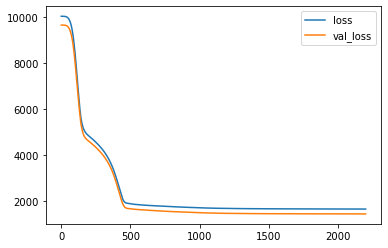

In [50]:
losses.plot(kind='line')

Looking at the graph most of the models improvement happens before around 400 epochs. Now we use the model to predict the results.

In [51]:
predictions = model.predict(X_test)

12/12 [==============================] - 0s 971us/step


In [52]:
print('Mean absolute error:')
print(mean_absolute_error(y_test,predictions))
print('Mean squared error:' )
print(mean_squared_error(y_test,predictions))
print('Square root of Mean squared error:' )
print(np.sqrt(mean_squared_error(y_test,predictions)))

Mean absolute error:
1444.0807869774305
Mean squared error:
18437474.076038513
Square root of Mean squared error:
4293.8879906255725


Slightly better explained variance score and mean absolute error. However, not much improvement on the mean squared error.

In [53]:
explained_variance_score(y_test,predictions)

0.6409775043581829

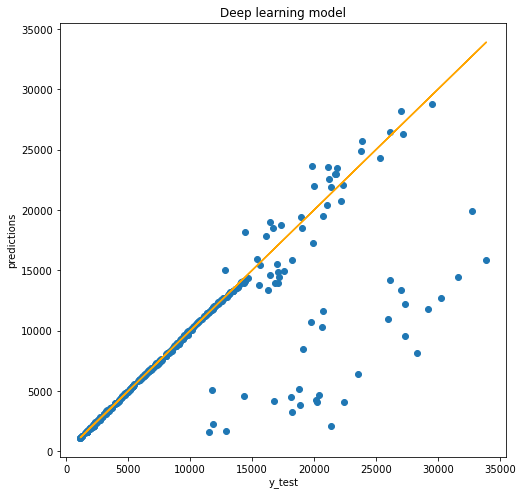

In [54]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Deep learning model')
plt.plot(y_test,y_test,color='orange')

From this graph we see that the model can quite accurately predict costs upto around 15000. However, past this point it struggles to predict the results. The model often under predicts the true price of medical costs beyond 15000. This model might be slightly better than the previous model at predicting costs upto 15000.